In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('dataset.csv')

/var/folders/_h/4nq6vjss06n4c6lxgh67t_rm0000gn/T/ipykernel_1558/112859877.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset.csv')


In [52]:
df.head()

,Subject,Image Data ID,Data Quality Rating,Group,CTcaudalanteriorcingulateL,CTcaudalmiddlefrontalL,CTcuneusL,CTentorhinalL,CTfusiformL,CTinferiorparietalL,...,FDprecentralR,FDprecuneusR,FDrostralanteriorcingulateR,FDrostralmiddlefrontalR,FDsuperiorfrontalR,FDsuperiorparietalR,FDsuperiortemporalR,FDsupramarginalR,FDtransversetemporalR,FDinsulaR
0,3101.0,I353356,1.0,PD,2.248,2.450,1.879,3.346,2.621,2.384,...,2.1286,2.1516,1.9409,2.1685,2.2665,2.1008,2.2065,2.1208,1.7844,2.1254
1,3104.0,I301552,1.0,Control,2.220,2.533,1.925,3.430,2.544,2.360,...,2.1475,2.1602,1.9567,2.1543,2.2493,2.1469,2.2173,2.1830,1.7808,2.1321
2,3105.0,I226403,1.0,PD,2.056,2.568,1.998,3.056,2.468,2.508,...,2.1284,2.1495,1.9454,2.1431,2.2240,2.1883,2.1926,2.1935,1.7871,2.0905
3,3106.0,I491581,1.0,Control,2.267,2.516,1.986,2.288,2.589,2.320,...,2.0885,2.1266,1.8295,2.1620,2.2266,2.1280,2.1599,2.1561,1.7469,2.0267
4,3108.0,I232161,1.0,PD,2.532,2.580,2.070,3.111,2.678,2.508,...,2.1411,2.1313,1.8824,2.1734,2.2749,2.1478,2.2046,2.1816,1.7674,2.1020


In [53]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)
df = df.dropna()

In [54]:
df.head()

,Group,CTcaudalanteriorcingulateL,CTcaudalmiddlefrontalL,CTcuneusL,CTentorhinalL,CTfusiformL,CTinferiorparietalL,CTinferiortemporalL,CTisthmuscingulateL,CTlateraloccipitalL,...,FDprecentralR,FDprecuneusR,FDrostralanteriorcingulateR,FDrostralmiddlefrontalR,FDsuperiorfrontalR,FDsuperiorparietalR,FDsuperiortemporalR,FDsupramarginalR,FDtransversetemporalR,FDinsulaR
0,PD,2.248,2.450,1.879,3.346,2.621,2.384,2.831,2.096,2.101,...,2.1286,2.1516,1.9409,2.1685,2.2665,2.1008,2.2065,2.1208,1.7844,2.1254
1,Control,2.220,2.533,1.925,3.430,2.544,2.360,2.811,2.412,2.265,...,2.1475,2.1602,1.9567,2.1543,2.2493,2.1469,2.2173,2.1830,1.7808,2.1321
2,PD,2.056,2.568,1.998,3.056,2.468,2.508,2.743,2.008,2.169,...,2.1284,2.1495,1.9454,2.1431,2.2240,2.1883,2.1926,2.1935,1.7871,2.0905
3,Control,2.267,2.516,1.986,2.288,2.589,2.320,2.808,2.093,2.205,...,2.0885,2.1266,1.8295,2.1620,2.2266,2.1280,2.1599,2.1561,1.7469,2.0267
4,PD,2.532,2.580,2.070,3.111,2.678,2.508,2.724,2.255,2.358,...,2.1411,2.1313,1.8824,2.1734,2.2749,2.1478,2.2046,2.1816,1.7674,2.1020


In [55]:
df.dtypes

Group                          object
CTcaudalanteriorcingulateL    float64
CTcaudalmiddlefrontalL        float64
CTcuneusL                     float64
CTentorhinalL                 float64
                               ...   
FDsuperiorparietalR           float64
FDsuperiortemporalR           float64
FDsupramarginalR              float64
FDtransversetemporalR         float64
FDinsulaR                     float64
Length: 125, dtype: object

In [56]:
(df['Group'].value_counts())

Group
PD         96
Control    61
Name: count, dtype: int64

In [57]:
ct_columns = df.columns[1:63]
regions_CT = {
    'Frontal':['CTsuperiorfrontalL', 'CTsuperiorfrontalR', 'CTcaudalanteriorcingulateL', 'CTcaudalanteriorcingulateR', 
               'CTcaudalmiddlefrontalL', 'CTcaudalmiddlefrontalR', 'CTlateralorbitofrontalL', 'CTlateralorbitofrontalR', 
               'CTmedialorbitofrontalL', 'CTmedialorbitofrontalR', 'CTparacentralL', 'CTparacentralR', 'CTparsopercularisL', 
               'CTparsopercularisR', 'CTparsorbitalisL', 'CTparsorbitalisR', 'CTparstriangularisL', 'CTparstriangularisR',
               'CTprecentralL', 'CTprecentralR', 'CTrostralanteriorcingulateL', 'CTrostralanteriorcingulateR', 
               'CTrostralmiddlefrontalL','CTrostralmiddlefrontalR', 
               ],
    'Parietal':['CTsuperiorparietalL', 'CTsuperiorparietalR', 'CTinferiorparietalL', 'CTinferiorparietalR', 'CTsupramarginalL', 
                'CTsupramarginalR', 'CTpostcentralL', 'CTpostcentralR', 'CTprecuneusL', 'CTprecuneusR'
                ],
    'Occipital':['CTlateraloccipitalR', 'CTlateraloccipitalL', 'CTlingualL', 'CTlingualR', 'CTcuneusR', 'CTcuneusL',
                 'CTpericalcarineL', 'CTpericalcarineR'
                 ],
    'Temporal':['CTsuperiortemporalL', 'CTsuperiortemporalR', 'CTmiddletemporalL', 'CTmiddletemporalR', 
                'CTinferiortemporalL', 'CTinferiortemporalR', 'CTfusiformR', 'CTfusiformL', 
                'CTtransversetemporalL', 'CTtransversetemporalR', 'CTentorhinalL', 'CTentorhinalR', 
                'CTparahippocampalL', 'CTparahippocampalR', 'CTisthmuscingulateL', 'CTisthmuscingulateR',
                'CTposteriorcingulateL', 'CTposteriorcingulateR'
                ],
}

/var/folders/_h/4nq6vjss06n4c6lxgh67t_rm0000gn/T/ipykernel_1558/509070056.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=columns[0], data=df, palette='Set2', width=0.5, notch=True)  # Using the first column in the region for visualization
/var/folders/_h/4nq6vjss06n4c6lxgh67t_rm0000gn/T/ipykernel_1558/509070056.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y=columns[0], data=df, palette='Set2', width=0.5, notch=True)  # Using the first column in the region for visualization
/var/folders/_h/4nq6vjss06n4c6lxgh67t_rm0000gn/T/ipykernel_1558/509070056.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

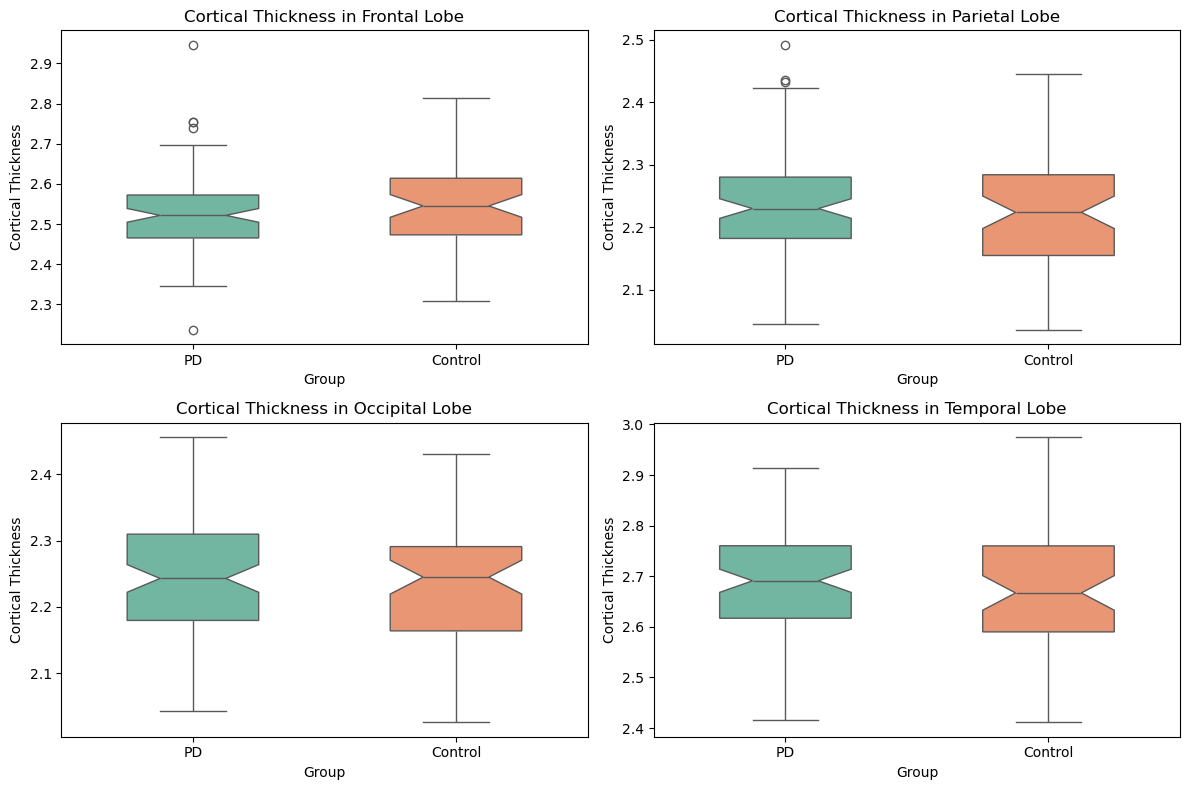

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialise the figure and axis for the plots
plt.figure(figsize=(12, 8))

# Loop through each brain region and create a box plot for the 'Group' column
for region, columns in regions_CT.items():
    plt.subplot(2, 2, list(regions_CT.keys()).index(region) + 1)  # Create subplots for each region
    sns.boxplot(x='Group', y=columns[0], data=df, palette='Set2', width=0.5, notch=True)  # Using the first column in the region for visualization
    plt.title(f'Cortical Thickness in {region} Lobe')
    plt.xlabel('Group')
    plt.ylabel('Cortical Thickness')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [59]:
from sklearn.preprocessing import LabelEncoder

features = pd.DataFrame({region: df[columns[0]] for region, columns in regions_CT.items()})
target = LabelEncoder().fit_transform(df['Group'])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [61]:
from sklearn.ensemble import RandomForestClassifier

# Initialise the Random Forest classifier
clf = RandomForestClassifier(class_weight= 'balanced', random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [62]:
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

/var/folders/_h/4nq6vjss06n4c6lxgh67t_rm0000gn/T/ipykernel_1558/1648357862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


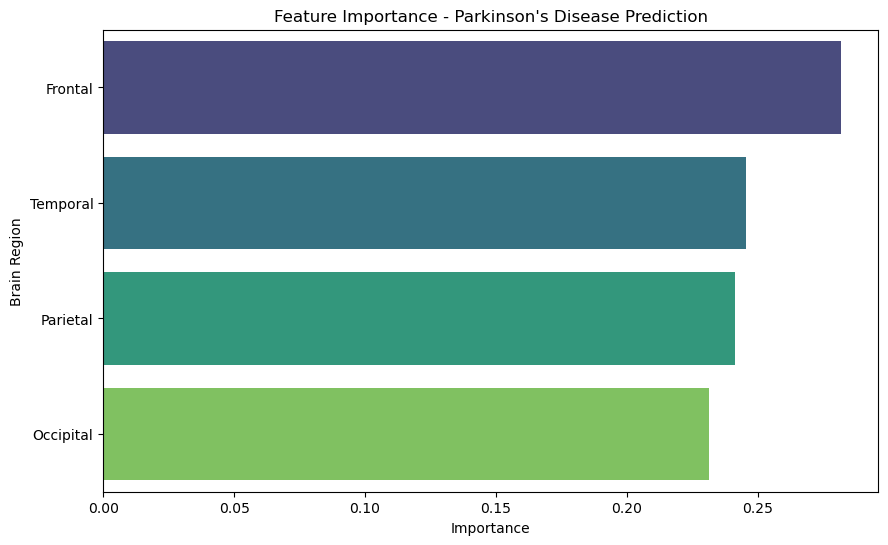

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Parkinson\'s Disease Prediction')
plt.xlabel('Importance')
plt.ylabel('Brain Region')
plt.show()

In [64]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their potential values
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],      # Minimum number of samples required to be at a leaf node
    'class_weight': ['balanced']
}

clf = RandomForestClassifier(class_weight= 'balanced', random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [65]:
from sklearn.model_selection import cross_val_score

# Perform K-fold cross-validation (5 folds) with the best model
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.68 0.36 0.68 0.52 0.72]
Mean CV Accuracy: 0.592


In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Initialise Stratified K-Fold with 5 folds
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialise the Random Forest classifier with class weights
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Lists to store cross-validation results
accuracies = []

# Iterate through the folds for training and validation
for train_index, val_index in stratified_kfold.split(features, target):
    X_train_fold, X_val_fold = features.iloc[train_index], features.iloc[val_index]
    y_train_fold, y_val_fold = target[train_index], target[val_index]
    
    # Train the classifier
    clf.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation set
    predictions = clf.predict(X_val_fold)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val_fold, predictions)
    accuracies.append(accuracy)

# Calculate and print the mean accuracy across all folds
mean_accuracy = sum(accuracies) / len(accuracies)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.5860887096774193


In [67]:
from sklearn.metrics import f1_score

# Train your model and make predictions on the test data
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Calculate the F1-score
f1 = f1_score(y_test, predictions)

print("F1-Score:", f1)

F1-Score: 0.65


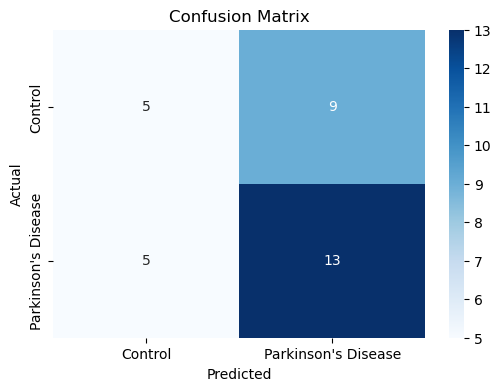

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Control', 'Parkinson\'s Disease'],
            yticklabels=['Control', 'Parkinson\'s Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()